In [1]:
import tensorflow as tf
import os
import zipfile #to handle zip file
import pandas as pd

In [2]:
os.listdir('test-fashion')

['images.csv', 'test-fashion']

In [3]:
os.listdir('test-fashion\\test-fashion')

['Bag',
 'Blazer',
 'Cap',
 'Dress',
 'Jwellery',
 'Outwear',
 'Pants',
 'Scarf',
 'Shoes',
 'Shorts',
 'Skirt',
 'Sunglasses',
 'T-Shirt',
 'Top',
 'Vallet']

In [4]:
os.listdir('test-fashion\\test-fashion\\Blazer')

['00b8048d-635e-4e56-b182-071fb24eea32.jpg',
 '01a54355-b591-45e9-a248-175f483369cf.jpg',
 'download (1).jpg',
 'download (2).jpg',
 'download (3).jpg',
 'download (4).jpg',
 'download (5).jpg',
 'download (6).jpg',
 'download (7).jpg',
 'download.jpg',
 'images (1).jpg',
 'images (10).jpg',
 'images (11).jpg',
 'images (12).jpg',
 'images (13).jpg',
 'images (14).jpg',
 'images (15).jpg',
 'images (16).jpg',
 'images (17).jpg',
 'images (18).jpg',
 'images (19).jpg',
 'images (2).jpg',
 'images (20).jpg',
 'images (21).jpg',
 'images (22).jpg',
 'images (23).jpg',
 'images (24).jpg',
 'images (25).jpg',
 'images (26).jpg',
 'images (27).jpg',
 'images (28).jpg',
 'images (29).jpg',
 'images (3).jpg',
 'images (30).jpg',
 'images (31).jpg',
 'images (32).jpg',
 'images (33).jpg',
 'images (34).jpg',
 'images (35).jpg',
 'images (36).jpg',
 'images (37).jpg',
 'images (38).jpg',
 'images (39).jpg',
 'images (4).jpg',
 'images (40).jpg',
 'images (41).jpg',
 'images (42).jpg',
 'images (

In [5]:
len(os.listdir('test-fashion\\test-fashion\\Blazer'))

92

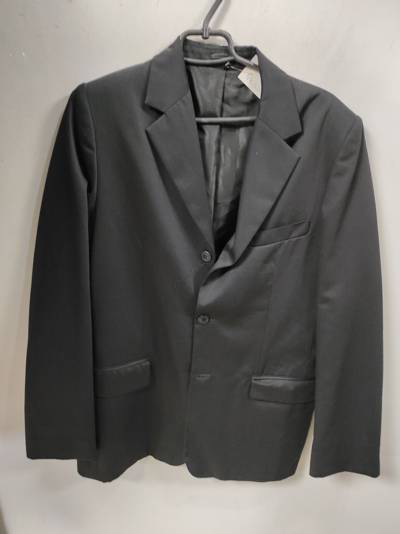

In [6]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
img = load_img('test-fashion\\test-fashion\\Blazer\\00b8048d-635e-4e56-b182-071fb24eea32.jpg')
img

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

path = os.path.join('test-fashion\\test-fashion')
path

'test-fashion\\test-fashion'

In [8]:
batch_size =500
epochs = 20
IMG_HIEGHT = 150
IMG_WIDHT = 150

In [9]:
image_generator = ImageDataGenerator(rescale=1./255)
img_iter = image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=path,
                                                           shuffle=True,
                                                           target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                           class_mode="categorical",
                                                            )

Found 3991 images belonging to 15 classes.


In [10]:
img_iter.class_indices

{'Bag': 0,
 'Blazer': 1,
 'Cap': 2,
 'Dress': 3,
 'Jwellery': 4,
 'Outwear': 5,
 'Pants': 6,
 'Scarf': 7,
 'Shoes': 8,
 'Shorts': 9,
 'Skirt': 10,
 'Sunglasses': 11,
 'T-Shirt': 12,
 'Top': 13,
 'Vallet': 14}

In [11]:
sample_image,labels = next(img_iter)
sample_image.shape

(500, 150, 150, 3)

In [12]:
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [13]:
sample_image

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

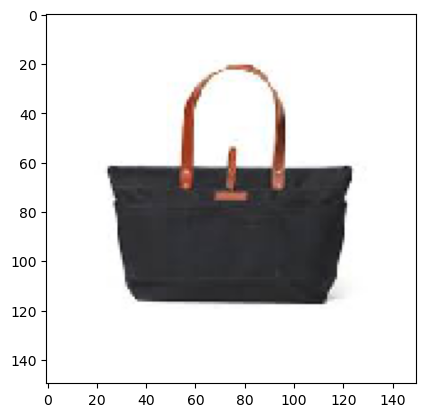

In [14]:
plt.imshow(sample_image[0])

In [15]:
def plotImages(images_arr):
    fig, axes = plt.subplots(2,8,figsize=(10,10))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

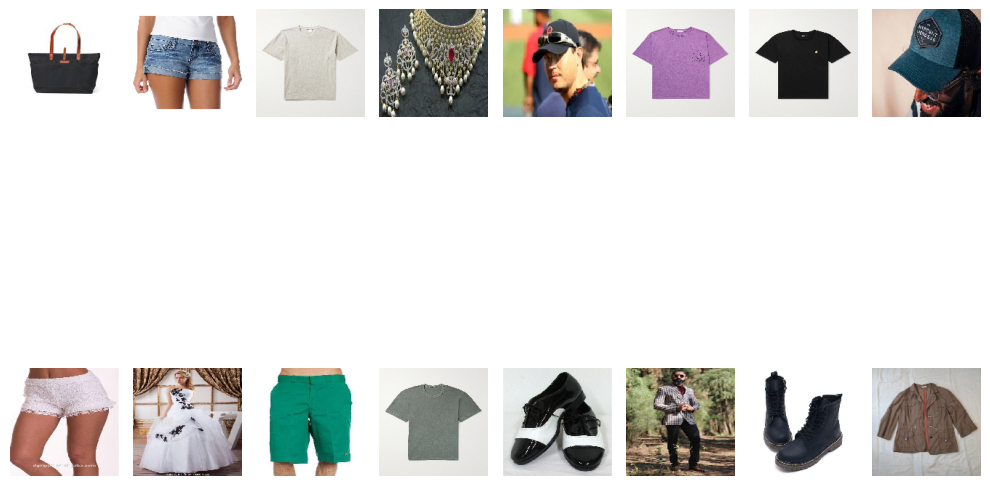

In [16]:
 plotImages(sample_image[0:16])

In [17]:
model = Sequential([
    Conv2D(15,3,padding='same',activation='relu',input_shape=(IMG_HIEGHT,IMG_WIDHT,3)), #150
    MaxPooling2D(), #75
    Conv2D(30,3,padding='same',activation='relu'), #75
    MaxPooling2D(),#37
    Conv2D(30,3,padding='same',activation='relu'),#37
    MaxPooling2D(),#18
    Flatten(),
    Dense(512,activation='relu'),
    Dense(15,activation='Softmax')
])

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
history = model.fit(img_iter,epochs=epochs)

Epoch 1/20
8/8 [==============================] - 111s 13s/step - loss: 2.3040 - accuracy: 0.2638
Epoch 2/20
8/8 [==============================] - 118s 15s/step - loss: 1.7565 - accuracy: 0.5094
Epoch 3/20
8/8 [==============================] - 181s 23s/step - loss: 1.4717 - accuracy: 0.5678
Epoch 4/20
8/8 [==============================] - 190s 23s/step - loss: 1.2835 - accuracy: 0.6194
Epoch 5/20
8/8 [==============================] - 178s 21s/step - loss: 1.1165 - accuracy: 0.6595
Epoch 6/20
8/8 [==============================] - 162s 19s/step - loss: 0.9872 - accuracy: 0.6971
Epoch 7/20
8/8 [==============================] - 145s 17s/step - loss: 0.8922 - accuracy: 0.7279
Epoch 8/20
8/8 [==============================] - 141s 17s/step - loss: 0.7778 - accuracy: 0.7662
Epoch 9/20
8/8 [==============================] - 139s 17s/step - loss: 0.6787 - accuracy: 0.8021
Epoch 10/20
8/8 [==============================] - 136s 16s/step - loss: 0.5924 - accuracy: 0.8173
Epoch 11/20
8/8 [==

In [20]:
history.history

{'loss': [2.3040268421173096,
  1.7565333843231201,
  1.471722960472107,
  1.2835421562194824,
  1.1165422201156616,
  0.9871619939804077,
  0.8921904563903809,
  0.7778154611587524,
  0.6786813735961914,
  0.5924338698387146,
  0.49417951703071594,
  0.43557336926460266,
  0.3870007395744324,
  0.3135286271572113,
  0.23324619233608246,
  0.19728893041610718,
  0.15838536620140076,
  0.1355099380016327,
  0.10595383495092392,
  0.08146975189447403],
 'accuracy': [0.2638436555862427,
  0.5093961358070374,
  0.5677775144577026,
  0.6193936467170715,
  0.6594838500022888,
  0.6970683932304382,
  0.727887749671936,
  0.7662240266799927,
  0.8020546436309814,
  0.8173390030860901,
  0.8544224500656128,
  0.8742169737815857,
  0.8864946365356445,
  0.9188173413276672,
  0.9481332898139954,
  0.9518917798995972,
  0.9659233093261719,
  0.9714357256889343,
  0.9799548983573914,
  0.9877223968505859]}

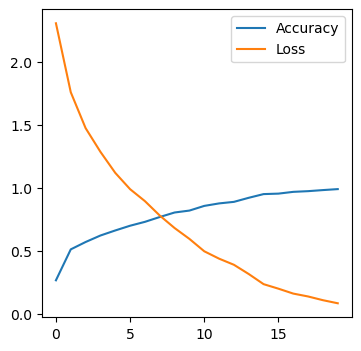

In [21]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs_range = range(epochs)
plt.figure(figsize=(4,4))
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,loss,label='Loss')
plt.legend(loc=0)
plt.show()

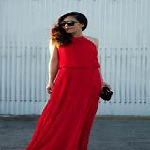

In [22]:
test_img = load_img('dress1.jpg',target_size=(150,150))
test_img

In [23]:
test_array = img_to_array(test_img)
test_array = test_array.reshape(1,150,150,3)
test_array.shape

(1, 150, 150, 3)

In [24]:
model.predict(test_array)

1/1 [==============================] - 12s 12s/step


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [25]:
temp=list(img_iter.class_indices.keys())
temp

['Bag',
 'Blazer',
 'Cap',
 'Dress',
 'Jwellery',
 'Outwear',
 'Pants',
 'Scarf',
 'Shoes',
 'Shorts',
 'Skirt',
 'Sunglasses',
 'T-Shirt',
 'Top',
 'Vallet']

In [26]:
str1=temp[np.argmax(model.predict(test_array))]
str1

1/1 [==============================] - 0s 44ms/step


'Dress'

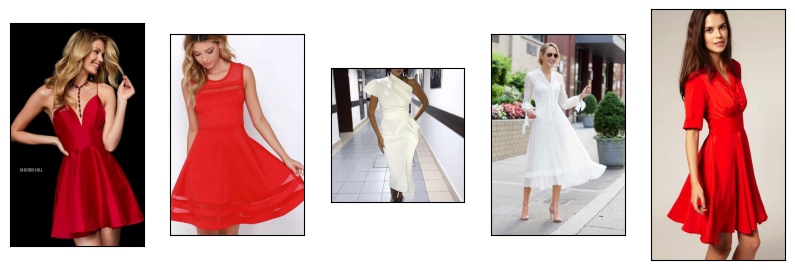

In [27]:
#simmilar product recommendation

def simImages():
    for i in temp:
        if str1==i: 
            simDir = os.path.join(path,i)      
        
    plt.figure(figsize=(10,10))
    for i in range(5):
        plt.subplot(1,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        imagessam=os.listdir(simDir)
        imagessam1 = load_img(simDir+"\\"+imagessam[i])
        plt.imshow(imagessam1)
    plt.show()

simImages()

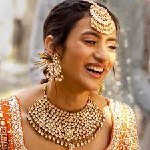

In [28]:
test_img_jewel = load_img('jewel.jpg',target_size=(150,150))
test_img_jewel

In [29]:
test_array_jewel = img_to_array(test_img_jewel)
test_array_jewel = test_array_jewel.reshape(1,150,150,3)
test_array_jewel.shape

(1, 150, 150, 3)

In [30]:
model.predict(test_array_jewel)

1/1 [==============================] - 0s 64ms/step


array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [31]:
str1=temp[np.argmax(model.predict(test_array_jewel))]
str1

1/1 [==============================] - 0s 58ms/step


'Jwellery'

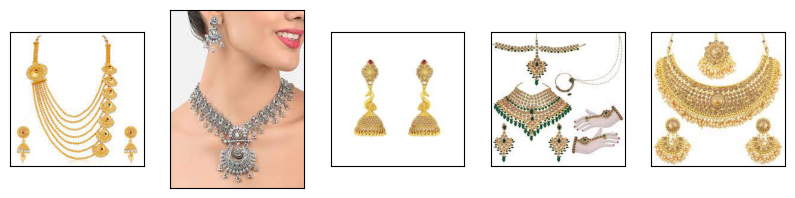

In [32]:
simImages()